In [13]:
import tensorflow as tf

In [14]:
print (tf.__version__)

1.13.1


In [15]:
mnist = tf.keras.datasets.fashion_mnist

In [16]:
(x_train, y_train),( x_test, y_test ) = mnist.load_data()


In [17]:
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train/255.0
x_test = x_test.reshape(10000,28,28,1)
x_test = x_test/255.0

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( 128, (5,5), activation='relu', input_shape=(28,28,1) ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D( 128, (4,4), activation='relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D( 128, (3,3), activation='relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(526, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 128)       3328      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         262272    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 128)         147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
__________

In [20]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={} ):
        if ( logs.get('acc') > 0.9998 ):
            print ("\nAlcanzado un 99 % de precision del entrenamiento")
            self.model.stop_training = True
callbacks = myCallBack()

In [21]:
model.fit(x_train,y_train,epochs=1000,callbacks=[callbacks])

Epoch 1/1000
60000/60000 [==============================] - 335s 6ms/sample - loss: 0.4924 - acc: 0.8165
Epoch 2/1000
35872/60000 [================>.............] - ETA: 2:46 - loss: 0.3252 - acc: 0.8804

KeyboardInterrupt: 

In [10]:
test_loss = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 26s 3ms/sample - loss: 0.3707 - acc: 0.9143


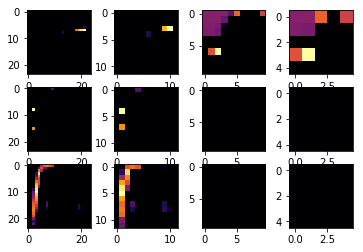

In [12]:
import matplotlib.pyplot as plt
f , axarr = plt.subplots(3,4)
FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model( inputs = model.input, outputs = layer_outputs )
for x in range (0,4):
    f1 = activation_model.predict( x_test[FIRST_IMAGE].reshape(1,28,28,1) )[x]
    axarr[0,x].imshow( f1[0, : , : ,CONVOLUTION_NUMBER], cmap='inferno' )
    axarr[0,x].grid(False)
    f2 = activation_model.predict( x_test[SECOND_IMAGE].reshape(1,28,28,1) )[x]
    axarr[1,x].imshow( f2[0, : , : ,CONVOLUTION_NUMBER], cmap='inferno' )
    axarr[1,x].grid(False)
    f3 = activation_model.predict( x_test[THIRD_IMAGE].reshape(1,28,28,1) )[x]
    axarr[2,x].imshow( f3[0, : , : ,CONVOLUTION_NUMBER], cmap='inferno' )
    axarr[2,x].grid(False)